In [7]:
import pandas as pd
import numpy as np


# Use a csv file created in an earlier week, based on the original data set, but in which some problems have been resolved incl. categorical entries
# the health_NoCats now represents the corrected file with categorical data translated into numerical format
health = pd.read_csv('health_NoCats.csv', header = 0)  #this is the updated file with the more useable Age_Category which is ordered (unlike the original)
health.info()
health.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 56 columns):
Unnamed: 0                                                            3424 non-null int64
Persistency_Flag                                                      3424 non-null int64
Gluco_Record_During_Rx                                                3424 non-null int64
Dexa_During_Rx                                                        3424 non-null int64
Frag_Frac_During_Rx                                                   3424 non-null int64
Risk_Segment_During_Rx                                                3424 non-null int64
Adherent_Flag                                                         3424 non-null int64
Idn_Indicator                                                         3424 non-null int64
Injectable_Experience_During_Rx                                       3424 non-null int64
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms                3424 non-null

,Unnamed: 0,Persistency_Flag,Gluco_Record_During_Rx,Dexa_During_Rx,Frag_Frac_During_Rx,Risk_Segment_During_Rx,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,...,Change_RiskSeg_Worsened,Change_RiskSeg_Improved,Change_RiskSeg_Unk,ChangedTScore_Worsened,ChangedTScore_Improved,ChangedTScore_Unk,AsianRace_Flag,Midwest_Flag,Ntm_Speciality_MyBuckets1,Ntm_Speciality_MyBuckets2
0,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,1,1,0,1,0,...,0,0,1,0,0,1,1,0,0,0
2,2,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,3,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,0,1,0,0,1,1,0,1,1,...,0,0,1,0,0,1,0,1,0,0


In [8]:
#define the list of features (columns) to be used as predictors
#note this subset is constructed to create greater independence between columns and to eliminate unhelpful features based on bar charts of those features vs. drug persistency

features = ['Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_During_Rx', 'Risk_Segment_During_Rx', 'Adherent_Flag', 'Idn_Indicator', 
            'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 
            'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 
            'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 
            'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 
            'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias', 
            'Comorb_Osteoporosis_without_current_pathological_fracture', 'Comorb_Personal_history_of_malignant_neoplasm', 
            'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations', 'Concom_Narcotics', 
            'Concom_Systemic_Corticosteroids_Plain', 'Concom_Anti_Depressants_And_Mood_Stabilisers', 'Concom_Fluoroquinolones', 
            'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 
            'Concom_Viral_Vaccines', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism', 
            'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption', 'Risk_Chronic_Liver_Disease',  'Risk_Low_Calcium_Intake', 
            'Risk_Vitamin_D_Insufficiency', 'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness', 'Risk_Estrogen_Deficiency', 'Risk_Immobilization', 
            'Dexa_Freq_During_Rx_Bucket_Flag','Change_RiskSeg_Worsened','Change_RiskSeg_Improved', 'Change_RiskSeg_Unk' , 'ChangedTScore_Worsened', 
            'ChangedTScore_Improved', 'ChangedTScore_Unk', 'AsianRace_Flag',  'Midwest_Flag', 'Ntm_Speciality_MyBuckets1', 'Ntm_Speciality_MyBuckets2' ]

features1 = ['Persistency_Flag','Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_During_Rx', 'Risk_Segment_During_Rx', 'Adherent_Flag', 'Idn_Indicator', 
            'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 
            'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 
            'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 
            'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 
            'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias']
features2 = ['Persistency_Flag', 'Comorb_Osteoporosis_without_current_pathological_fracture', 'Comorb_Personal_history_of_malignant_neoplasm', 
            'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations', 'Concom_Narcotics', 
            'Concom_Systemic_Corticosteroids_Plain', 'Concom_Anti_Depressants_And_Mood_Stabilisers', 'Concom_Fluoroquinolones', 
            'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 
            'Concom_Viral_Vaccines', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism']

features3 =['Persistency_Flag','Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption', 'Risk_Chronic_Liver_Disease',  'Risk_Low_Calcium_Intake', 
            'Risk_Vitamin_D_Insufficiency', 'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness', 'Risk_Estrogen_Deficiency', 'Risk_Immobilization', 
            'Dexa_Freq_During_Rx_Bucket_Flag','Change_RiskSeg_Worsened','Change_RiskSeg_Improved', 'Change_RiskSeg_Unk' , 'ChangedTScore_Worsened', 
            'ChangedTScore_Improved', 'ChangedTScore_Unk', 'AsianRace_Flag',  'Midwest_Flag', 'Ntm_Speciality_MyBuckets1', 'Ntm_Speciality_MyBuckets2' ]



In [9]:
#examine correlations between variables in the dataset
health.corr()

,Unnamed: 0,Persistency_Flag,Gluco_Record_During_Rx,Dexa_During_Rx,Frag_Frac_During_Rx,Risk_Segment_During_Rx,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,...,Change_RiskSeg_Worsened,Change_RiskSeg_Improved,Change_RiskSeg_Unk,ChangedTScore_Worsened,ChangedTScore_Improved,ChangedTScore_Unk,AsianRace_Flag,Midwest_Flag,Ntm_Speciality_MyBuckets1,Ntm_Speciality_MyBuckets2
Unnamed: 0,1.000000,-0.020089,-0.000539,0.005562,0.064683,-0.158638,-0.059264,0.202579,0.077701,0.004961,...,0.063219,-0.003620,-0.092610,0.054493,-0.017119,-0.158638,0.054213,-0.082046,-0.005159,0.099542
Persistency_Flag,-0.020089,1.000000,0.212704,0.491823,0.106935,-0.180535,-0.112488,0.111440,0.098360,0.322320,...,0.089614,0.035594,-0.084896,0.115240,0.112934,-0.180535,0.036541,-0.088015,0.194379,-0.066920
Gluco_Record_During_Rx,-0.000539,0.212704,1.000000,0.118155,0.111802,-0.115432,-0.043668,0.143928,0.126182,0.085540,...,0.057902,0.009995,-0.060084,0.064858,0.017193,-0.115432,-0.064840,-0.030173,0.013319,-0.014899
Dexa_During_Rx,0.005562,0.491823,0.118155,1.000000,0.094189,-0.164109,-0.097857,0.037684,0.047813,0.274016,...,0.060062,0.057295,-0.085689,0.124784,0.137571,-0.164109,-0.008314,0.003922,0.156939,-0.015208
Frag_Frac_During_Rx,0.064683,0.106935,0.111802,0.094189,1.000000,-0.099585,-0.036413,0.060766,0.051375,0.027477,...,0.146378,-0.007593,-0.096419,0.040490,0.008482,-0.099585,0.021763,-0.024446,0.005105,0.005556
Risk_Segment_During_Rx,-0.158638,-0.180535,-0.115432,-0.164109,-0.099585,1.000000,0.042034,-0.075742,-0.118066,-0.110399,...,-0.168697,-0.070878,0.645355,-0.203322,-0.148085,1.000000,-0.021791,0.059205,-0.086753,-0.038862
Adherent_Flag,-0.059264,-0.112488,-0.043668,-0.097857,-0.036413,0.042034,1.000000,-0.036201,-0.054218,-0.073861,...,-0.020845,0.018551,0.012929,-0.074632,-0.018366,0.042034,-0.015135,0.002383,-0.007226,-0.001784
Idn_Indicator,0.202579,0.111440,0.143928,0.037684,0.060766,-0.075742,-0.036201,1.000000,0.275004,0.044808,...,0.013236,0.021609,-0.003648,0.051533,0.027958,-0.075742,-0.059610,-0.013423,0.094120,0.044423
Injectable_Experience_During_Rx,0.077701,0.098360,0.126182,0.047813,0.051375,-0.118066,-0.054218,0.275004,1.000000,0.050749,...,0.020453,0.027906,-0.056252,0.028387,0.023677,-0.118066,-0.005925,-0.008379,0.053567,0.043375
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,0.004961,0.322320,0.085540,0.274016,0.027477,-0.110399,-0.073861,0.044808,0.050749,1.000000,...,0.024894,0.030507,-0.034467,0.057772,0.053608,-0.110399,0.005283,0.002155,0.046019,-0.039417


In [10]:
#examine correlations between variables in the features list (subset)
#strongly correlated features should not be included together in classification models
health[features].corr()

,Gluco_Record_During_Rx,Dexa_During_Rx,Frag_Frac_During_Rx,Risk_Segment_During_Rx,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx,...,Change_RiskSeg_Worsened,Change_RiskSeg_Improved,Change_RiskSeg_Unk,ChangedTScore_Worsened,ChangedTScore_Improved,ChangedTScore_Unk,AsianRace_Flag,Midwest_Flag,Ntm_Speciality_MyBuckets1,Ntm_Speciality_MyBuckets2
Gluco_Record_During_Rx,1.000000,0.118155,0.111802,-0.115432,-0.043668,0.143928,0.126182,0.085540,0.160775,0.035044,...,0.057902,0.009995,-0.060084,0.064858,0.017193,-0.115432,-0.064840,-0.030173,0.013319,-0.014899
Dexa_During_Rx,0.118155,1.000000,0.094189,-0.164109,-0.097857,0.037684,0.047813,0.274016,0.220890,0.221744,...,0.060062,0.057295,-0.085689,0.124784,0.137571,-0.164109,-0.008314,0.003922,0.156939,-0.015208
Frag_Frac_During_Rx,0.111802,0.094189,1.000000,-0.099585,-0.036413,0.060766,0.051375,0.027477,0.073253,0.049954,...,0.146378,-0.007593,-0.096419,0.040490,0.008482,-0.099585,0.021763,-0.024446,0.005105,0.005556
Risk_Segment_During_Rx,-0.115432,-0.164109,-0.099585,1.000000,0.042034,-0.075742,-0.118066,-0.110399,-0.121517,-0.079622,...,-0.168697,-0.070878,0.645355,-0.203322,-0.148085,1.000000,-0.021791,0.059205,-0.086753,-0.038862
Adherent_Flag,-0.043668,-0.097857,-0.036413,0.042034,1.000000,-0.036201,-0.054218,-0.073861,-0.082041,-0.064621,...,-0.020845,0.018551,0.012929,-0.074632,-0.018366,0.042034,-0.015135,0.002383,-0.007226,-0.001784
Idn_Indicator,0.143928,0.037684,0.060766,-0.075742,-0.036201,1.000000,0.275004,0.044808,0.009617,-0.047617,...,0.013236,0.021609,-0.003648,0.051533,0.027958,-0.075742,-0.059610,-0.013423,0.094120,0.044423
Injectable_Experience_During_Rx,0.126182,0.047813,0.051375,-0.118066,-0.054218,0.275004,1.000000,0.050749,0.105597,0.044964,...,0.020453,0.027906,-0.056252,0.028387,0.023677,-0.118066,-0.005925,-0.008379,0.053567,0.043375
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,0.085540,0.274016,0.027477,-0.110399,-0.073861,0.044808,0.050749,1.000000,0.227780,0.295191,...,0.024894,0.030507,-0.034467,0.057772,0.053608,-0.110399,0.005283,0.002155,0.046019,-0.039417
Comorb_Encounter_For_Immunization,0.160775,0.220890,0.073253,-0.121517,-0.082041,0.009617,0.105597,0.227780,1.000000,0.348389,...,0.027177,0.016772,-0.087541,0.071300,0.044857,-0.121517,0.052774,-0.031307,0.003321,-0.014340
Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx,0.035044,0.221744,0.049954,-0.079622,-0.064621,-0.047617,0.044964,0.295191,0.348389,1.000000,...,0.013662,0.002341,-0.054078,0.048253,0.047107,-0.079622,0.057284,-0.046381,0.027076,-0.013368


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(abs(health[features1].corr()), vmin = 0, vmax = 1, annot = True)
heatmap.set_title("correlation heatmap, subset 1 of features", fontdict= {'fontsize' :12}, pad = 12)



Text(0.5, 1, 'correlation heatmap, subset 1 of features')

Text(0.5, 1, 'correlation heatmap, subset 2 of features')

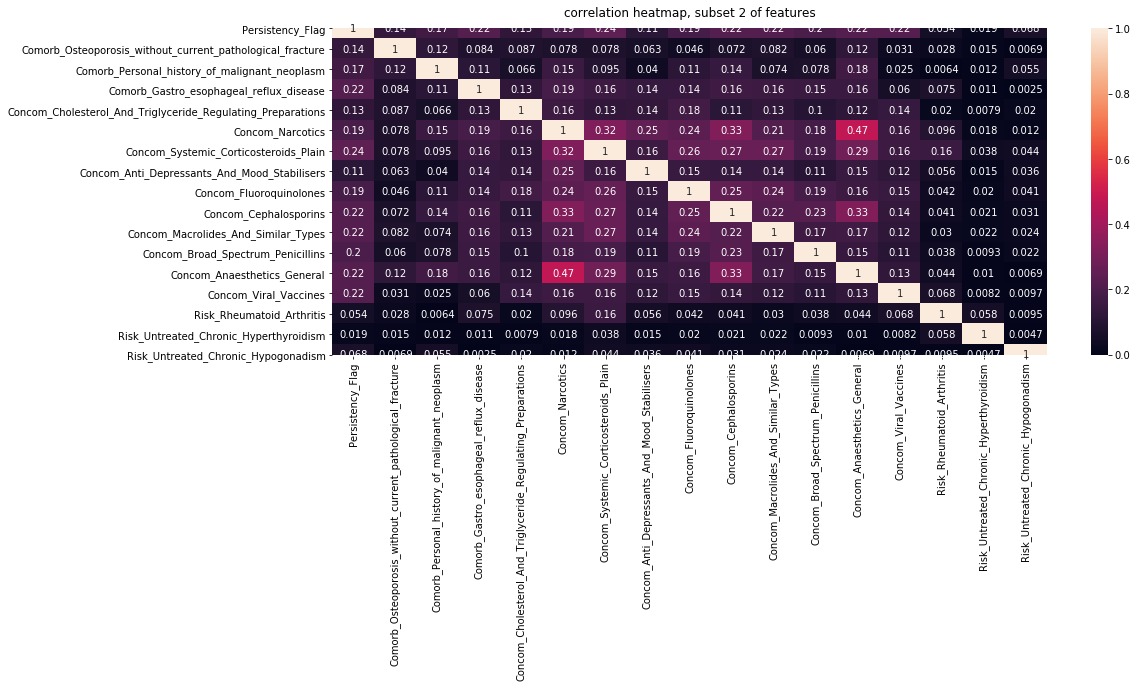

In [12]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(abs(health[features2].corr()), vmin = 0, vmax = 1, annot = True)
heatmap.set_title("correlation heatmap, subset 2 of features", fontdict= {'fontsize' :12}, pad = 12)

Text(0.5, 1, 'correlation heatmap, subset 3 of features')

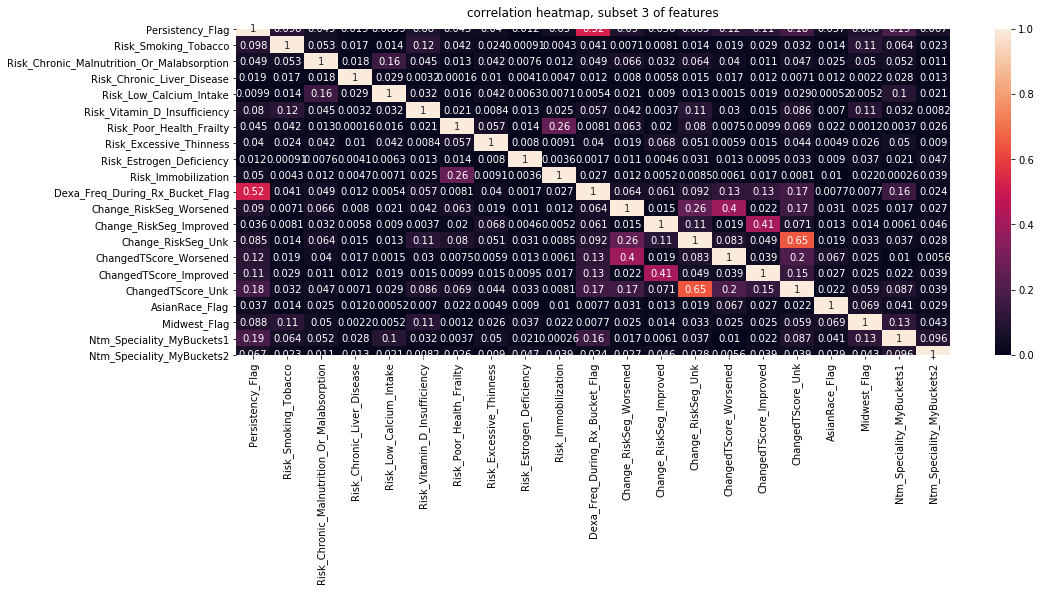

In [13]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(abs(health[features3].corr()), vmin = 0, vmax = 1, annot = True)
heatmap.set_title("correlation heatmap, subset 3 of features", fontdict= {'fontsize' :12}, pad = 12)

In [14]:
# import the sklearn package for use in log regression, import confusion matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# instantiate the model
logreg = LogisticRegression()

In [15]:
X = health[features]
y = health.Persistency_Flag


# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=27)

In [16]:
# fit the model with data - cannot run it yet, until variables are transformed
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC AUC: ",roc_auc_score(y, logreg.predict_proba(X)[:, 1]))


[[481  73]
 [ 87 215]]


/Users/jen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


NameError: name 'metrics' is not defined

In [ ]:
#statsmodels provides more information by way of summary()
#we can use this to refine the columns further (eliminating some)
#we are looking to keep those columns (predictor variables) with low values in the 'P>[t]'' column of the summary, or the ones where 'coef' has larger absolute value

import statsmodels.api as sm  
X_train = sm.add_constant(X_train)
lm_2 = sm.OLS(y_train, X_train).fit()
lm_2.summary()


In [ ]:
#now redefine features eliminating all those with importance vals from the list above less than 0.01
features = ['Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_During_Rx', 'Risk_Segment_During_Rx', 'Adherent_Flag', 'Idn_Indicator', 
            'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 
            'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 
            'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 
            'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 
            'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias', 
            'Comorb_Osteoporosis_without_current_pathological_fracture', 'Comorb_Personal_history_of_malignant_neoplasm', 
            'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations', 
            'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain', 'Concom_Anti_Depressants_And_Mood_Stabilisers', 'Concom_Fluoroquinolones', 
            'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 
            'Concom_Viral_Vaccines', 'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption','Risk_Vitamin_D_Insufficiency', 
            'Dexa_Freq_During_Rx_Bucket_Flag', 'Change_RiskSeg_Unk',
            'ChangedTScore_Unk', 'Midwest_Flag', 'Ntm_Speciality_MyBuckets1' ]

#rebuild the test and training sets with this new reduced set of features and without the extra column used by stats models
X = health[features]
y = health.Persistency_Flag

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=27)


In [17]:
from sklearn.ensemble import RandomForestClassifier



#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC AUC: ",roc_auc_score(y, clf.predict_proba(X)[:, 1]))



Accuracy: 0.8002336448598131
ROC AUC:  0.9871357895941701


In [18]:

# the above classifier also affords the opportunity to rank the predictor variables by importance (according to this classification method)

feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

Dexa_Freq_During_Rx_Bucket_Flag                                       0.102485
Dexa_During_Rx                                                        0.095810
Comorb_Long_Term_Current_Drug_Therapy                                 0.042900
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms                0.040306
Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx        0.038117
Comorb_Encounter_For_Immunization                                     0.037590
Midwest_Flag                                                          0.025225
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified                  0.025133
Ntm_Speciality_MyBuckets1                                             0.023980
Comorb_Personal_History_Of_Other_Diseases_And_Conditions              0.022405
Comorb_Gastro_esophageal_reflux_disease                               0.022190
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx    0.021085
Comorb_Disorders_of_lipoprotein_metabolism_and_other

In [19]:
#now redefine features eliminating all those with importance vals from the list above less than 0.01
features = ['Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_During_Rx', 'Risk_Segment_During_Rx', 'Adherent_Flag', 'Idn_Indicator', 
            'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 
            'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 
            'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 
            'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 
            'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias', 'Comorb_Osteoporosis_without_current_pathological_fracture', 
            'Comorb_Personal_history_of_malignant_neoplasm', 'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations', 
            'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain', 'Concom_Anti_Depressants_And_Mood_Stabilisers', 'Concom_Fluoroquinolones', 
            'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines', 
            'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption','Risk_Vitamin_D_Insufficiency', 'Dexa_Freq_During_Rx_Bucket_Flag', 'Change_RiskSeg_Unk',
            'ChangedTScore_Unk', 'Midwest_Flag', 'Ntm_Speciality_MyBuckets1' ]

In [20]:
#redefine the predictor variables with now smaller set of features

X = health[features]
y = health.Persistency_Flag

#set training and test sets accordingly
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=27)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC AUC: ",roc_auc_score(y, clf.predict_proba(X)[:, 1]))

Accuracy: 0.8084112149532711
ROC AUC:  0.9855015325134493


In [21]:
# Note - the accuracy with random forest on fewer predictors is very close to what it was with the larger set of predictors (within 2 %)

In [22]:
#now with log reg on smaller set of features (predictors)
# fit the model with data 
# instantiate the model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("ROC AUC: ",roc_auc_score(y, logreg.predict_proba(X)[:, 1]))

[[480  74]
 [ 87 215]]
Accuracy: 0.8119158878504673
ROC AUC:  0.8883846926706432


/Users/jen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.ensemble import AdaBoostRegressor #For Regression
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
cl = AdaBoostClassifier(n_estimators=100, base_estimator=dtree,learning_rate=1)
cl.fit(X_train,y_train)

# prediction on test set
y_pred=cl.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC AUC: ",roc_auc_score(y, cl.predict_proba(X)[:, 1]))

Accuracy: 0.7873831775700935
ROC AUC:  0.9805833180415077


In [24]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor #For Regression
cl = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
cl.fit(X_train, y_train)

# prediction on test set
y_pred=cl.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC AUC: ",roc_auc_score(y, cl.predict_proba(X)[:, 1]))

Accuracy: 0.8130841121495327
ROC AUC:  0.8888467177686168


In [25]:
# to run the next one I had to install a new package
# install -c anaconda py-xgboost

In [26]:

from xgboost import XGBClassifier
xgbc = XGBClassifier()

xgbc.fit(X_train, y_train)


# prediction on test set
y_pred=xgbc.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("ROC AUC: ",roc_auc_score(y, xgbc.predict_proba(X)[:, 1]))

Accuracy: 0.8165887850467289
ROC AUC:  0.9077108954711367


In [374]:
# in order to use the next classifiers, that take into account imbalanced classes, I had to install imbalanced-learn

#conda install -c conda-forge imbalanced-learn

In [375]:
# This classifier addresses the imbalanced classes (unequal persistent vs. non-persistent) producing substantially superior results to earlier efforts
# that ignored the class imbalance

# bagged decision trees with random undersampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedBaggingClassifier

# define model
model = BalancedBaggingClassifier()




# define model
model = BalancedBaggingClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=27)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.2f' % mean(scores))

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.2f' % mean(scores))


Mean ROC AUC: 0.84
Mean Accuracy: 0.78


In [376]:
# Random  Forest with random undersampling for Imbalanced Classif.
#This is another classifier that addresses the imbalanced classes (unequal persistent vs. non-persistent)
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier


# define model
model = BalancedRandomForestClassifier(n_estimators=10)


# define model
model = BalancedRandomForestClassifier(n_estimators=10)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.2f' % mean(scores))


# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Mean accuracy: %.2f' % mean(scores))


Mean ROC AUC: 0.86
Mean accuracy: 0.79
